<a href="https://colab.research.google.com/github/990921HVQ/Acoplamiento-molecular/blob/main/CHEMBL_Act_Inact_DNMT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Base de datos_SQA_HVQ/Bioactividades_CHEMBL/DNMT1/196_compuestos

/content/drive/MyDrive/Base de datos_SQA_HVQ/Bioactividades_CHEMBL/DNMT1/196_compuestos


In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 27.1 MB/s eta 0:00:00


In [ ]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 6.4 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [ ]:
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

In [ ]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [ ]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [ ]:
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [ ]:
uniprot_id = "P26358"

In [ ]:
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [ ]:
targets1 = pd.DataFrame.from_records(targets)
targets1

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,CHEMBL1993,SINGLE PROTEIN
1,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,CHEMBL1993,SINGLE PROTEIN


In [ ]:
target = targets1.iloc[0]
target

organism                                    Homo sapiens
pref_name           DNA (cytosine-5)-methyltransferase 1
target_chembl_id                              CHEMBL1993
target_type                               SINGLE PROTEIN
Name: 0, dtype: object

In [ ]:
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")

The target ChEMBL ID is CHEMBL1993


In [ ]:
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "pref_name",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 233, <class 'chembl_webresource_client.query_set.QuerySet'>


In [ ]:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 1671884,
 'assay_chembl_id': 'CHEMBL862798',
 'assay_description': 'Inhibitory activity against DNA methyl transferase in leukemic NALM6 cells',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL382617',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '100000.0',
 'target_chembl_id': 'CHEMBL1993',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'uM',
 'value': '100.0'}

In [ ]:
bioactivities_df = pd.DataFrame.from_records(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head(8)

DataFrame shape: (234, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1671884,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL382617,=,nM,100000.0,CHEMBL1993,Homo sapiens,IC50,uM,100.0
1,1671884,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL382617,=,nM,100000.0,CHEMBL1993,Homo sapiens,IC50,uM,100.0
2,1671886,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL383475,=,nM,50000.0,CHEMBL1993,Homo sapiens,IC50,uM,50.0
3,2676536,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL418052,=,nM,2000.0,CHEMBL1993,Homo sapiens,IC50,uM,2.0
4,2676537,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL563570,=,nM,300000.0,CHEMBL1993,Homo sapiens,IC50,uM,300.0
5,2676539,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL561047,=,nM,45000.0,CHEMBL1993,Homo sapiens,IC50,uM,45.0
6,2676540,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL552309,=,nM,1500.0,CHEMBL1993,Homo sapiens,IC50,uM,1.5
7,2676541,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL552246,=,nM,8000.0,CHEMBL1993,Homo sapiens,IC50,uM,8.0


In [ ]:
bioactivities_df["units"].unique()

array(['uM', 'nM'], dtype=object)

In [ ]:
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
units                 object
value                 object
dtype: object

In [ ]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
units                  object
value                  object
dtype: object

In [ ]:
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (234, 13)


In [ ]:
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [ ]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (234, 13)


In [ ]:
bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (196, 13)


In [ ]:
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head(8)

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,1671884,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL382617,=,nM,100000.0,CHEMBL1993,Homo sapiens,IC50,uM,100.0
1,1671886,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL383475,=,nM,50000.0,CHEMBL1993,Homo sapiens,IC50,uM,50.0
2,2676536,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL418052,=,nM,2000.0,CHEMBL1993,Homo sapiens,IC50,uM,2.0
3,2676537,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL563570,=,nM,300000.0,CHEMBL1993,Homo sapiens,IC50,uM,300.0
4,2676539,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL561047,=,nM,45000.0,CHEMBL1993,Homo sapiens,IC50,uM,45.0
5,2676540,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL552309,=,nM,1500.0,CHEMBL1993,Homo sapiens,IC50,uM,1.5
6,2676541,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL552246,=,nM,8000.0,CHEMBL1993,Homo sapiens,IC50,uM,8.0
7,2676542,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL563946,=,nM,45000.0,CHEMBL1993,Homo sapiens,IC50,uM,45.0


In [ ]:
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head(8)

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type,units,value
0,1671884,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL382617,=,nM,100000.0,CHEMBL1993,Homo sapiens,IC50,uM,100.0
1,1671886,CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,CHEMBL383475,=,nM,50000.0,CHEMBL1993,Homo sapiens,IC50,uM,50.0
2,2676536,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL418052,=,nM,2000.0,CHEMBL1993,Homo sapiens,IC50,uM,2.0
3,2676537,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL563570,=,nM,300000.0,CHEMBL1993,Homo sapiens,IC50,uM,300.0
4,2676539,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL561047,=,nM,45000.0,CHEMBL1993,Homo sapiens,IC50,uM,45.0
5,2676540,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL552309,=,nM,1500.0,CHEMBL1993,Homo sapiens,IC50,uM,1.5
6,2676541,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL552246,=,nM,8000.0,CHEMBL1993,Homo sapiens,IC50,uM,8.0
7,2676542,CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,CHEMBL563946,=,nM,45000.0,CHEMBL1993,Homo sapiens,IC50,uM,45.0


In [ ]:
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 196


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type', 'units', 'value'],
      dtype='object')

In [ ]:
compounds_provider = compounds_api.filter(molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])).only("molecule_chembl_id", "molecule_structures")

In [ ]:
compounds = list(tqdm(compounds_provider))

  0%|          | 0/196 [00:00<?, ?it/s]

In [ ]:
compounds_df = pd.DataFrame.from_records(compounds)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (196, 2)


In [ ]:
compounds_df.head(8)

,molecule_chembl_id,molecule_structures
0,CHEMBL44,{'canonical_smiles': 'O=c1c(-c2ccc(O)cc2)coc2c...
1,CHEMBL418052,{'canonical_smiles': 'Nc1ncnc2c1ncn2[C@@H]1O[C...
2,CHEMBL297453,{'canonical_smiles': 'O=C(O[C@@H]1Cc2c(O)cc(O)...
3,CHEMBL83747,{'canonical_smiles': 'O=C(NCCSSCCNC(=O)/C(Cc1c...
4,CHEMBL318782,{'canonical_smiles': 'O=C1C(Cl)=C(Cl)C(=O)c2cc...
5,CHEMBL115145,{'canonical_smiles': 'O=C(O)c1cc(Cc2ccc(O)c(C(...
6,CHEMBL382617,{'canonical_smiles': 'Cc1ccn2c(CCc3nnc4cc(C)cc...
7,CHEMBL383475,{'canonical_smiles': 'O=C(O)C(Cc1c[nH]c2ccccc1...


In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (196, 2)


In [ ]:
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (196, 2)


In [ ]:
compounds_df.iloc[0].molecule_structures.keys()

dict_keys(['canonical_smiles', 'molfile', 'standard_inchi', 'standard_inchi_key'])

In [ ]:
canonical_smiles = []
for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (196, 2)


In [ ]:
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (196, 2)


In [ ]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 196


Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [ ]:
compounds_df.reset_index(drop=True, inplace=True)
compounds_df.head(8)

,molecule_chembl_id,smiles
0,CHEMBL44,O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12
1,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...
2,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...
3,CHEMBL83747,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...
4,CHEMBL318782,O=C1C(Cl)=C(Cl)C(=O)c2ccccc21
5,CHEMBL115145,O=C(O)c1cc(Cc2ccc(O)c(C(=O)O)c2)ccc1O
6,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1
7,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O


In [ ]:
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

In [ ]:
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 196 entries.


In [ ]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
units                  object
smiles                 object
dtype: object

In [ ]:
output_df.head(8)

,molecule_chembl_id,IC50,units,units,smiles
0,CHEMBL382617,100000.0,nM,uM,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1
1,CHEMBL383475,50000.0,nM,uM,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O
2,CHEMBL418052,2000.0,nM,uM,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...
3,CHEMBL563570,300000.0,nM,uM,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...
4,CHEMBL561047,45000.0,nM,uM,Nc1nccc2c1ncn2[C@@H]1O[C@H](CSCCC(N)C(=O)O)[C@...
5,CHEMBL552309,1500.0,nM,uM,Nc1ncnc2c1ccn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...
6,CHEMBL552246,8000.0,nM,uM,Nc1ncnc2c1nnn2[C@@H]1O[C@H](CSCCC(N)C(=O)O)[C@...
7,CHEMBL563946,45000.0,nM,uM,Nc1ccnc2c1ncn2[C@@H]1O[C@H](CSCCC(N)C(=O)O)[C@...


In [ ]:
def convert_ic50_to_pic50(IC50_value):
    pIC50_value =  9 - math.log10(IC50_value)
    return pIC50_value

In [ ]:
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [ ]:
output_df.head(196)

,molecule_chembl_id,IC50,units,units,smiles,pIC50
0,CHEMBL382617,100000.0,nM,uM,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,4.000000
1,CHEMBL383475,50000.0,nM,uM,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,4.301030
2,CHEMBL418052,2000.0,nM,uM,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,5.698970
3,CHEMBL563570,300000.0,nM,uM,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,3.522879
4,CHEMBL561047,45000.0,nM,uM,Nc1nccc2c1ncn2[C@@H]1O[C@H](CSCCC(N)C(=O)O)[C@...,4.346787
...,...,...,...,...,...,...
191,CHEMBL4869419,323.0,nM,nM,COc1cc2nc(-c3ccc(C)o3)cc(NCC3CCN(Cc4ccc(C(=O)N...,6.490797
192,CHEMBL4874514,540.0,nM,nM,COc1cc2nc(-c3ccc(C)o3)cc(NCC3CCN(C4CC(C(=O)NO)...,6.267606
193,CHEMBL4855461,2660.0,nM,nM,COc1cc2nc(-c3ccc(C)o3)cc(N[C@H]3CC[C@@H](C(=O)...,5.575118
194,CHEMBL4856550,4180.0,nM,nM,COc1cc2nc(-c3ccc(C)o3)cc(N[C@H]3CC[C@H](C(=O)N...,5.378824


array([[<AxesSubplot:title={'center':'pIC50'}>]], dtype=object)

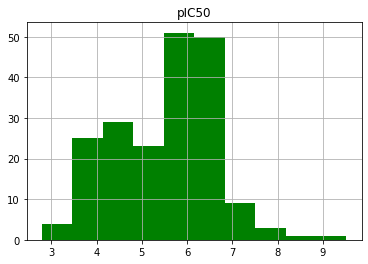

In [ ]:
output_df.hist(column="pIC50", color="green")


<AxesSubplot:>

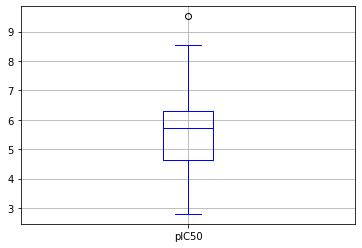

In [ ]:
output_df.boxplot(column="pIC50", color="blue")

In [ ]:
output_df_2 = output_df [["molecule_chembl_id", "smiles", "pIC50"]]

In [ ]:
output_df_2

,molecule_chembl_id,smiles,pIC50
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,4.000000
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,4.301030
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,5.698970
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,3.522879
4,CHEMBL561047,Nc1nccc2c1ncn2[C@@H]1O[C@H](CSCCC(N)C(=O)O)[C@...,4.346787
...,...,...,...
191,CHEMBL4869419,COc1cc2nc(-c3ccc(C)o3)cc(NCC3CCN(Cc4ccc(C(=O)N...,6.490797
192,CHEMBL4874514,COc1cc2nc(-c3ccc(C)o3)cc(NCC3CCN(C4CC(C(=O)NO)...,6.267606
193,CHEMBL4855461,COc1cc2nc(-c3ccc(C)o3)cc(N[C@H]3CC[C@@H](C(=O)...,5.575118
194,CHEMBL4856550,COc1cc2nc(-c3ccc(C)o3)cc(N[C@H]3CC[C@H](C(=O)N...,5.378824


In [ ]:
output_df_2.to_csv('output_df_2.csv', index=False)